In [1]:
#pip install beautifulsoup4

In [2]:
#pip install webdriver_manager

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import trange

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time
from selenium.webdriver.common.keys import Keys


In [4]:
driver = webdriver.Chrome(executable_path='C:\sol\chromedriver.exe')
driver.implicitly_wait(1)
driver.get('http://shinhan.haezone.com/inSaju.asp?bType=A104&resize=#menuIndex3')
driver.implicitly_wait(1)

print("+" * 50)
print(driver.title)
print(driver.current_url)
print("사주팔자 내 운명의 배우자 크롤링")
print("-" * 50)

# 신한카드 운세 '내 운명의 배우자' 클릭
sinhan = driver.find_element_by_css_selector("#wrap > div.top_nav.marT20 > ul > li:nth-child(3) > ul > li:nth-child(5) > a")
sinhan.click()

time.sleep(3)

# 성별 선택자
select_sex = Select(driver.find_element_by_name('bSex'))
select_sex.select_by_index(index=0)
#select.select_by_visible_text(text="option_text")
#select.select_by_value(value='고리오')

#생년
select_year = Select(driver.find_element_by_name('bYear'))
select_year.select_by_value(value='1994')
#월
select_month = Select(driver.find_element_by_name('bMonth'))
select_month.select_by_value(value='11')
#일
select_day = Select(driver.find_element_by_name('bDay'))
select_day.select_by_value(value='8')

#태어난시간
select_hour = Select(driver.find_element_by_name('bHour'))
select_hour.select_by_index(index=6)
# 0,1,4,5,6,7,10 / 2,3,8,9,11 / 12

#양력/음력
select_lunar = Select(driver.find_element_by_name('bLunar'))
select_lunar.select_by_index(index=0)

#운세보기 클릭
fortune = driver.find_element_by_xpath('//*[@id="wrap2"]/form/div/div[2]/div/div/input')
fortune.click()

#class name을 통한 element 접근하기
# 외모
elem1 = driver.find_elements_by_xpath('//*[@id="ConsResult"]/div[3]/p')
print("외모")
print("="*100)
print(elem1)
print("="*100)
# 성격
elem2 = driver.find_elements_by_xpath('//*[@id="ConsResult"]/div[4]/p')
print("성격")
print("="*100)
print(elem2)
print("="*100)



++++++++++++++++++++++++++++++++++++++++++++++++++
신한생명
http://shinhan.haezone.com/inSaju.asp?bType=A104&resize=#menuIndex3
사주팔자 내 운명의 배우자 크롤링
--------------------------------------------------
외모
[<selenium.webdriver.remote.webelement.WebElement (session="105713cdbef288dd93c8190a2a5f6509", element="df1d732b-71bd-46f1-9873-bc95ee80c60d")>]
성격
[<selenium.webdriver.remote.webelement.WebElement (session="105713cdbef288dd93c8190a2a5f6509", element="205382fc-f918-4aa5-8cba-f7430548edfe")>]


In [5]:
#텍스트 split
for td in elem1:
    row = td.text
    row_list1 = row.split("\n")
    print(row_list1)
for td2 in elem2:
    row = td2.text
    row_list2 = row.split(".")
    print(row_list2)

['키가 작고 통통하네요', '관능적인 매력 보다는 모성적인 모습과 귀여운 외모로 더 어필하는 스타일입니다', '얼굴이 좀 큰 편이며 눈이 선하고 예쁩니다', '입술이 도톰하여 웃을 때 모습이 더욱 예쁜 사람이네요', '손과 발이 복스럽게 통통하며 사회성 보다는 가정적인 모습과 조용한 모습을 더 좋아하지요', '머리를 기르지 못할 정도로 짧은 머리를 선호합니다', '지적이며 포근한 외모의 여성이네요']
['사려 깊고 이해심이 많은 여성입니다', ' 여성적인 성향이 강하며 조용하게 대화하는 것을 즐기는 스타일이지요', ' 요란한 것을 싫어하고 새로운 사람과 어울리는 것에 대해 그다지 익숙하지 않습니다', ' 친구들이 많이 따르는 편이며 성격이 치우치지 않고 공정한 편입니다', ' 비교적 낙천적인 성격이어서 매사를 긍정적으로 보려는 노력을 하는군요', '']


In [6]:
import pandas as pd

df1 = pd.DataFrame(row_list1)
df2 = pd.DataFrame(row_list2)

In [7]:
df1.columns = ['외모']


In [8]:
df2.columns = ['성격']


In [9]:
df1

,외모
0,키가 작고 통통하네요
1,관능적인 매력 보다는 모성적인 모습과 귀여운 외모로 더 어필하는 스타일입니다
2,얼굴이 좀 큰 편이며 눈이 선하고 예쁩니다
3,입술이 도톰하여 웃을 때 모습이 더욱 예쁜 사람이네요
4,손과 발이 복스럽게 통통하며 사회성 보다는 가정적인 모습과 조용한 모습을 더 좋아하지요
5,머리를 기르지 못할 정도로 짧은 머리를 선호합니다
6,지적이며 포근한 외모의 여성이네요


In [10]:
df2

,성격
0,사려 깊고 이해심이 많은 여성입니다
1,여성적인 성향이 강하며 조용하게 대화하는 것을 즐기는 스타일이지요
2,요란한 것을 싫어하고 새로운 사람과 어울리는 것에 대해 그다지 익숙하지 않습니다
3,친구들이 많이 따르는 편이며 성격이 치우치지 않고 공정한 편입니다
4,비교적 낙천적인 성격이어서 매사를 긍정적으로 보려는 노력을 하는군요
5,


In [11]:
result = pd.concat([df1,df2],axis=1)


In [12]:
result

,외모,성격
0,키가 작고 통통하네요,사려 깊고 이해심이 많은 여성입니다
1,관능적인 매력 보다는 모성적인 모습과 귀여운 외모로 더 어필하는 스타일입니다,여성적인 성향이 강하며 조용하게 대화하는 것을 즐기는 스타일이지요
2,얼굴이 좀 큰 편이며 눈이 선하고 예쁩니다,요란한 것을 싫어하고 새로운 사람과 어울리는 것에 대해 그다지 익숙하지 않습니다
3,입술이 도톰하여 웃을 때 모습이 더욱 예쁜 사람이네요,친구들이 많이 따르는 편이며 성격이 치우치지 않고 공정한 편입니다
4,손과 발이 복스럽게 통통하며 사회성 보다는 가정적인 모습과 조용한 모습을 더 좋아하지요,비교적 낙천적인 성격이어서 매사를 긍정적으로 보려는 노력을 하는군요
5,머리를 기르지 못할 정도로 짧은 머리를 선호합니다,
6,지적이며 포근한 외모의 여성이네요,NaN


In [34]:
result.to_csv("사주팔자연습.csv", mode='a', header=False)

In [13]:
merge = ""
for i in result['외모']:
    merge = merge + i
merge

'키가 작고 통통하네요관능적인 매력 보다는 모성적인 모습과 귀여운 외모로 더 어필하는 스타일입니다얼굴이 좀 큰 편이며 눈이 선하고 예쁩니다입술이 도톰하여 웃을 때 모습이 더욱 예쁜 사람이네요손과 발이 복스럽게 통통하며 사회성 보다는 가정적인 모습과 조용한 모습을 더 좋아하지요머리를 기르지 못할 정도로 짧은 머리를 선호합니다지적이며 포근한 외모의 여성이네요'

In [15]:
#!pip install konlpy
#!pip install wordcloud

In [16]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [28]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [20]:
def get_noun(news):
    
    okt = Okt()
    noun = okt.nouns(news)
    noun = [n for n in noun if len(n) > 1 ]
    
    count =Counter(noun)
    noun_list = count.most_common(50)
    
    return noun_list


In [31]:
def visualize(noun_list):
    
    wc = WordCloud(font_path='malgun.ttf',\
        background_color="white",\
        width=1000,\
        height=1000,\
        max_words=100,\
        max_font_size=300)
    
    wc.generate_from_frequencies(dict(noun_list))
    wc.to_file('keyword.png')
    


In [33]:
noun_list = get_noun(merge)
visualize(noun_list)

In [ ]:
# 형태소 분석
    # 1. 크롤링한 파일을 읽기전용으로 호출함
    # 2. 형태소 검출가공을 위해 변수에 전체를 다시저장
    # 3. konlpy 모듈호출 및 객체생성
    # 4. 각 문장별(for문 사용)로 형태소구분 및 품사매칭 (koLNPy함수)
    # 5. 명사나 형용사만 선별해 리스트에 담기
    # 6. 선별된 품사별 빈도수 계산 & 상위 빈도 10위 까지 출력


In [39]:
from collections import Counter

# 1. 크롤링한 파일을 읽기전용으로 호출함
file = open('사주팔자연습.csv','r',encoding='utf-8')
lines = file.readlines()

# 2. 변수 okja에 전체댓글을 다시저장
saju = []
for line in lines:
    saju.append(line)
file.close()

# 3. 트윗터 패키지 안에 konlpy 모듈호출
from konlpy.tag import Twitter
twitter = Twitter()



# 4. 각 문장별로 형태소 구분하기
sentences_tag = []
for sentence in saju:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    print(morph)
    print('-'*30)

print(sentences_tag)
print(len(sentences_tag))
print('\n'*3)


# 5. 명사 혹은 형용사인 품사만 선별해 리스트에 담기
noun_adj_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective']:
            noun_adj_list.append(word)

# 6. 선별된 품사별 빈도수 계산 & 상위 빈도 10위 까지 출력
counts = Counter(noun_adj_list)
print(counts.most_common(10))


[('0', 'Number'), (',', 'Punctuation'), ('키', 'Noun'), ('가', 'Josa'), ('작고', 'Noun'), ('통통하네요', 'Adjective'), (',', 'Punctuation'), ('사려', 'Noun'), ('깊고', 'Adjective'), ('이', 'Determiner'), ('해심', 'Noun'), ('이', 'Josa'), ('많은', 'Adjective'), ('여성', 'Noun'), ('입니다', 'Adjective'), ('\n', 'Foreign')]
------------------------------
[('1', 'Number'), (',', 'Punctuation'), ('관능', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('매력', 'Noun'), ('보다는', 'Josa'), ('모', 'Modifier'), ('성적', 'Noun'), ('인', 'Josa'), ('모습', 'Noun'), ('과', 'Josa'), ('귀여운', 'Adjective'), ('외모', 'Noun'), ('로', 'Josa'), ('더', 'Noun'), ('어필', 'Noun'), ('하는', 'Verb'), ('스타일', 'Noun'), ('입니다', 'Adjective'), (',', 'Punctuation'), ('여성', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('성향', 'Noun'), ('이', 'Josa'), ('강하며', 'Adjective'), ('조용하게', 'Adjective'), ('대화', 'Noun'), ('하는', 'Verb'), ('것', 'Noun'), ('을', 'Josa'), ('즐기는', 'Verb'), ('스타일', 'Noun'), ('이지', 'Noun'), ('요', 'Josa'), ('\n', 'Foreign')]
------------------------------
[('2',

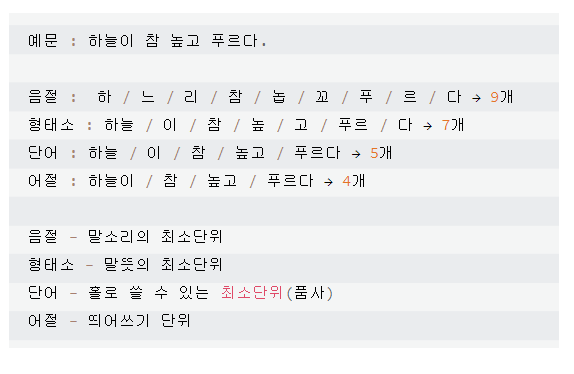

In [ ]:
#